<a href="https://colab.research.google.com/github/Ankan1998/Model-Analysis-RNN-vs-CNN-for-Image-Data/blob/master/image_classification_with_recurrent_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.random.set_seed(99)

## This Fashion MNIST dataset included in Tensorflow Library

In [3]:
fas_mnist=tf.keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels)=fas_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
train_images=train_images.reshape(60000, 28, 28)
train_images=train_images / 255.0 #Standardising
test_images = test_images.reshape(10000, 28, 28)
test_images=test_images/255.0 #Standardising

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
# The concept is simple, we take each HxW matrix of images --> Flatten it like sequence of Multi-dimensional time-series and feed to LSTM
# HxW changes to TxD 
# In images H--> height, W--> width, similiarly T-->Timestamp(equals H), D-->Feature(equals W)
model = tf.keras.Sequential([
  tf.keras.Input(shape=(28,28)),
  tf.keras.layers.GRU(128),
  tf.keras.layers.Dense(128, activation='relu',input_shape=(28, 28, )),
  tf.keras.layers.Dropout(0.2,input_shape=(128,)),
  tf.keras.layers.Dense(10, activation='softmax')
])



In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               60672     
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 78,474
Trainable params: 78,474
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
def scheduler(epoch, lr):
      if epoch < 8:
        return lr
      else:
        return lr * tf.math.exp(-0.1)

In [12]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2),
    tf.keras.callbacks.LearningRateScheduler(scheduler)
]

In [13]:
trainer=model.fit(train_images, train_labels,validation_data=(test_images,test_labels), epochs=20,callbacks=my_callbacks)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6287 - accuracy: 0.7664 - val_loss: 0.4637 - val_accuracy: 0.8289
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4034 - accuracy: 0.8507 - val_loss: 0.3745 - val_accuracy: 0.8570
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3508 - accuracy: 0.8701 - val_loss: 0.3473 - val_accuracy: 0.8688
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3180 - accuracy: 0.8823 - val_loss: 0.3298 - val_accuracy: 0.8760
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2947 - accuracy: 0.8906 - val_loss: 0.3174 - val_accuracy: 0.8846
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2776 - accuracy: 0.8967 - val_loss: 0.2981 - val_accuracy: 0.8906
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2612 - accuracy: 0.9023 - val_loss: 0.2936 - val_accuracy:

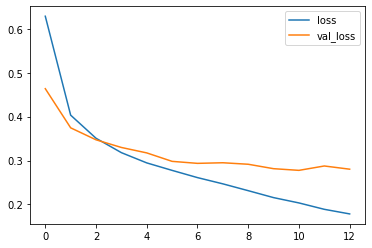

In [14]:
# Plot loss per iteration
plt.plot(trainer.history['loss'], label='loss')
plt.plot(trainer.history['val_loss'], label='val_loss')
plt.legend()

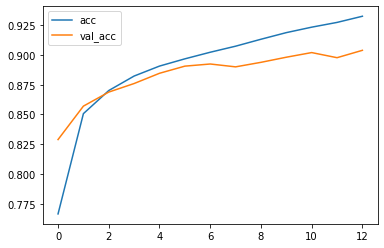

In [15]:
# Plot accuracy per iteration
plt.plot(trainer.history['accuracy'], label='acc')
plt.plot(trainer.history['val_accuracy'], label='val_acc')
plt.legend()